## 1. Find the camera matrix and distortion Co-efficients

In [1]:
# import essential modules
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [3]:
import os

path_calibration = "camera_cal/"
calibration_images = os.listdir(path_calibration)

obj_point_list = []
img_point_list = []

#Getting Objectpoints 
obj_points = np.zeros((9*6,3), np.float32)
obj_points[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
#iterating through all images in the folder 
for image in calibration_images:
    # generate the actual path of the image
    img_path = os.path.join(path_calibration, image)
    img = mpimg.imread(img_path)
    # convert the image to gray scale as the findChessboardCorners takes only gray scale images
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray,(9,6), None)
    if ret:
        obj_point_list.append(obj_points)
        img_point_list.append(corners)

# get the camera matrix and distorted matrix
ret, mtx, dist, rvec, tvec = cv2.calibrateCamera(obj_point_list, img_point_list, gray.shape[::-1], None, None)



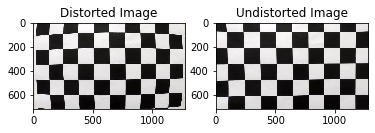

In [4]:
%matplotlib inline
img_path = os.path.join(path_calibration, "calibration1.jpg")
img = mpimg.imread(img_path)
plt.subplot(121)
plt.title("Distorted Image")
plt.imshow(img)
undistort = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(122)
plt.title("Undistorted Image")
plt.imshow(undistort)